In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### Importing MNIST Dataset

In [2]:
df = pd.read_csv('mnist_train.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [4]:
X = df.values
print(X.shape)

(60000, 785)


In [5]:
x_train = X[:,1:]
print(x_train.shape)
y_train = X[:,0]
print(y_train.shape)

(60000, 784)
(60000,)


### KNN Algorithm

In [6]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [7]:
def KNN(X_train,labels,QueryPoint,k = 5):
    
    n = X_train.shape[0]
    distance = []
    
    # Compute distances using Euclidean distance
    for i in range(n):
        distance.append((euclidean_distance(X_train[i],QueryPoint),labels[i]))
    
    # Sort them according to their distance values
    distance = sorted(distance, key=lambda x: x[0])
    
    # Considering the K-Nearest Neighbours to take majority voting
    distance = distance[:k]
    label = []
    for i in range(k):
        label.append(distance[i][1])
        
    
    freq = np.unique(label,return_counts=True)
    return freq[0][np.argmax(freq[1])]
    

### Using K-Means Algorithm for Image Segmentation

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [9]:
def segmentImage(image):
    
    # reshape the image for KMeans
    image = image.reshape((-1,3))
    # fit the image 
    kmeans.fit(image)
    image = image.reshape((28,28,3))
    centres = np.array(kmeans.cluster_centers_ )  # getting centres of the clusters
    labels = kmeans.labels_ # get labels of the clusters
    
    
    colors = np.unique(labels,return_counts=True)
    req_color = centres[colors[0][np.argmin(colors[1])]]  #get the required color from the image 
    a = colors[0][np.argmin(colors[1])]
    new_img = np.zeros(image.shape) 
    
    # assign the values of color to the new image 
    gray = np.zeros((1,784))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if labels[28*i+j]==a:
                new_img[i][j][0] = 255
                new_img[i][j][1] = 255
                new_img[i][j][2] = 255
                gray[0][28*i+j] = 255
    
    np.reshape(gray,(-1,784))
    
    # get predctions using KNN
    pred = KNN(x_train , y_train ,gray , 37)
    return pred

### Testing on an image

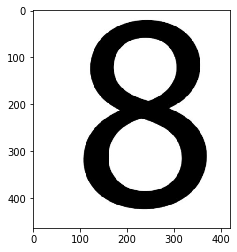

(464, 420, 3)


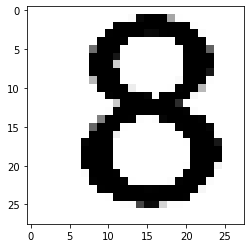

(28, 28, 3)
8


In [10]:
# Read Testing Image
image = cv2.imread("WhatsApp Image 2019-10-16 at 22.43.10.jpeg")
plt.imshow(image)    # show image using matplotlib
plt.show() 
print(image.shape)

image  = cv2.resize(image , (28,28))
plt.imshow(image)
plt.show()
print(image.shape)
print(segmentImage(image))   #printing the label

### Running On Live Stream

In [11]:
cap = cv2.VideoCapture(0)  # capturing frames using cv2

while(True):
    ret,frame = cap.read()
    
    if ret == False:
        continue
        
    
    
    image  = cv2.resize(frame , (28,28))
    
    label = segmentImage(image)
    org = (35,35)
    font = cv2.FONT_HERSHEY_SIMPLEX 
    fontScale = 1
    color = (255, 0, 0) 
    thickness = 2
    #displaying the predicted digit
    cv2.putText(frame,str(label),org,font,fontScale, color, thickness, cv2.LINE_AA)  
    cv2.imshow("Original Image",frame)
    
    key = cv2.waitKey(1) & 0xFF
    if key==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()